<a href="https://colab.research.google.com/github/Rahul711sharma/Spark/blob/main/Pyspark_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Origins are from from GFS : Google file system
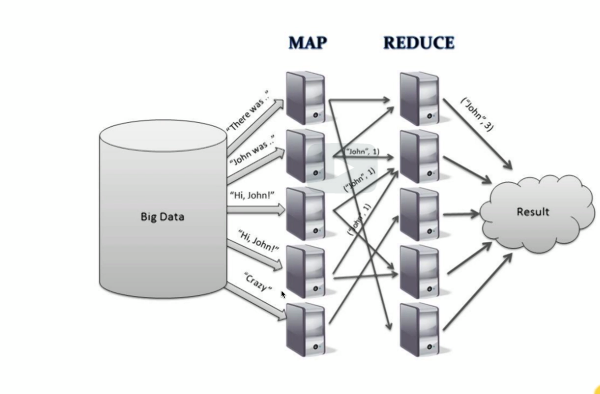

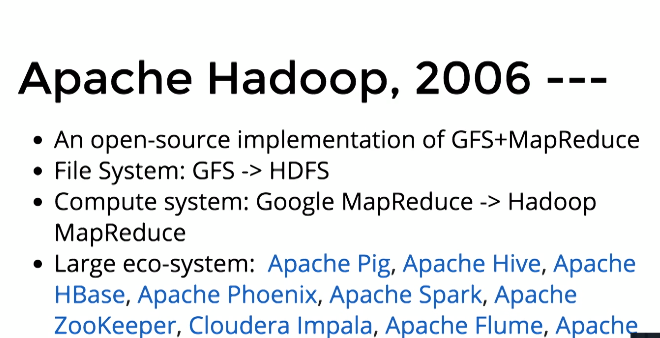

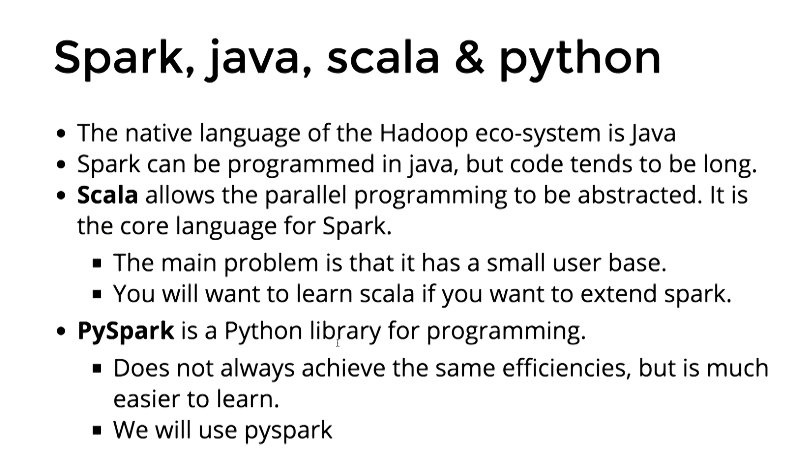

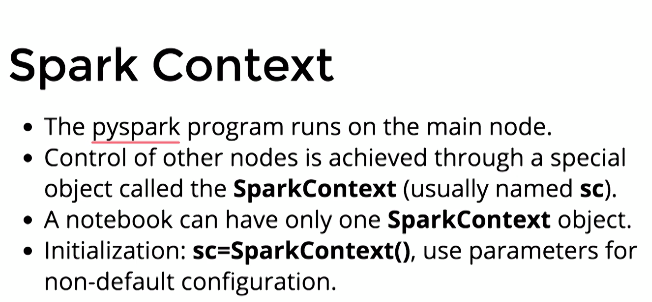

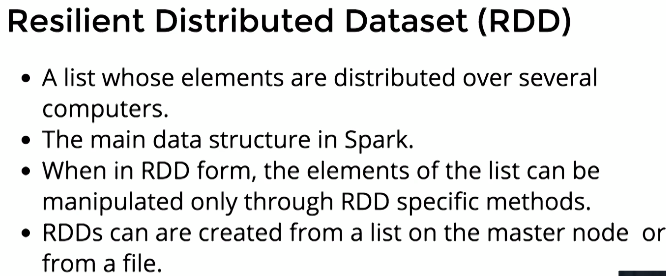

* RDD can be transfered to local list by using "collect" command

In [3]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 212.4MB 71kB/s 
     |████████████████████████████████| 204kB 17.2MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=812b85575ff4a9f383d3fa09e1a3cdf6f6fb4019123afac1d267c38bccac5228
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading

In [4]:
import pyspark
from pyspark.sql import dataframe
from pyspark import sql
import pyspark.sql.functions
# create the session


In [7]:
sc = pyspark.SparkContext()

In [8]:
%%time
1+2

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs


3

In [9]:
x = sc.parallelize([1,2,3,4,5])

In [10]:
x.collect()

[1, 2, 3, 4, 5]

In [11]:
x.map(lambda i:i*i).collect()

[1, 4, 9, 16, 25]

In [12]:
x.reduce(lambda i,y:i+y)

15

In [21]:
key_values = sc.parallelize([('a',1),('b',2),('c',3),('b',5),('d',3)])

In [22]:
key_values.groupByKey().collect()

[('b', <pyspark.resultiterable.ResultIterable at 0x7f8980811950>),
 ('c', <pyspark.resultiterable.ResultIterable at 0x7f8980811e10>),
 ('d', <pyspark.resultiterable.ResultIterable at 0x7f89704cf150>),
 ('a', <pyspark.resultiterable.ResultIterable at 0x7f8980811a10>)]

In [23]:
key_values.lookup('b')

[2, 5]

In [24]:
from sklearn import datasets
import pandas as pd

In [50]:
df = datasets.load_boston()
df = pd.DataFrame(df.data, columns=df.feature_names)

In [51]:
pysql=sql.SQLContext(sc)

In [57]:
sqldf = pysql.createDataFrame(df)

In [58]:
sqldf.select(['CRIM','ZN']).show()

+-------+----+
|   CRIM|  ZN|
+-------+----+
|0.00632|18.0|
|0.02731| 0.0|
|0.02729| 0.0|
|0.03237| 0.0|
|0.06905| 0.0|
|0.02985| 0.0|
|0.08829|12.5|
|0.14455|12.5|
|0.21124|12.5|
|0.17004|12.5|
|0.22489|12.5|
|0.11747|12.5|
|0.09378|12.5|
|0.62976| 0.0|
|0.63796| 0.0|
|0.62739| 0.0|
|1.05393| 0.0|
| 0.7842| 0.0|
|0.80271| 0.0|
| 0.7258| 0.0|
+-------+----+
only showing top 20 rows



In [66]:
sqldf.first()

Row(CRIM=0.00632, ZN=18.0, INDUS=2.31, CHAS=0.0, NOX=0.538, RM=6.575, AGE=65.2, DIS=4.09, RAD=1.0, TAX=296.0, PTRATIO=15.3, B=396.9, LSTAT=4.98)

In [67]:
sqldf.toPandas()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [68]:
sqldf.describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+
|summary|              CRIM|                ZN|             INDUS|              CHAS|                NOX|                RM|               AGE|               DIS|              RAD|               TAX|           PTRATIO|                 B|             LSTAT|
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|                506|               506|               506|               506|              506|               506|               506|           

In [69]:
sqldf.describe().columns[1:]

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [70]:
sqldf.toPandas().corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [71]:
display(sqldf.count())
sqldf.summary().show()

506

+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+
|summary|              CRIM|                ZN|             INDUS|              CHAS|                NOX|                RM|               AGE|               DIS|              RAD|               TAX|           PTRATIO|                 B|             LSTAT|
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|                506|               506|               506|               506|              506|               506|               506|           

In [72]:
sqldf.printSchema()

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: double (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: double (nullable = true)
 |-- TAX: double (nullable = true)
 |-- PTRATIO: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)

